In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures 

In [33]:
df=pd.read_csv(r"C:\Users\ilyes\Downloads\kc_house_data.csv")
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
def plot_correlation_map():
    corr=df.corr()
    s,ax=plt.subplots(figsize=(20,15))
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )


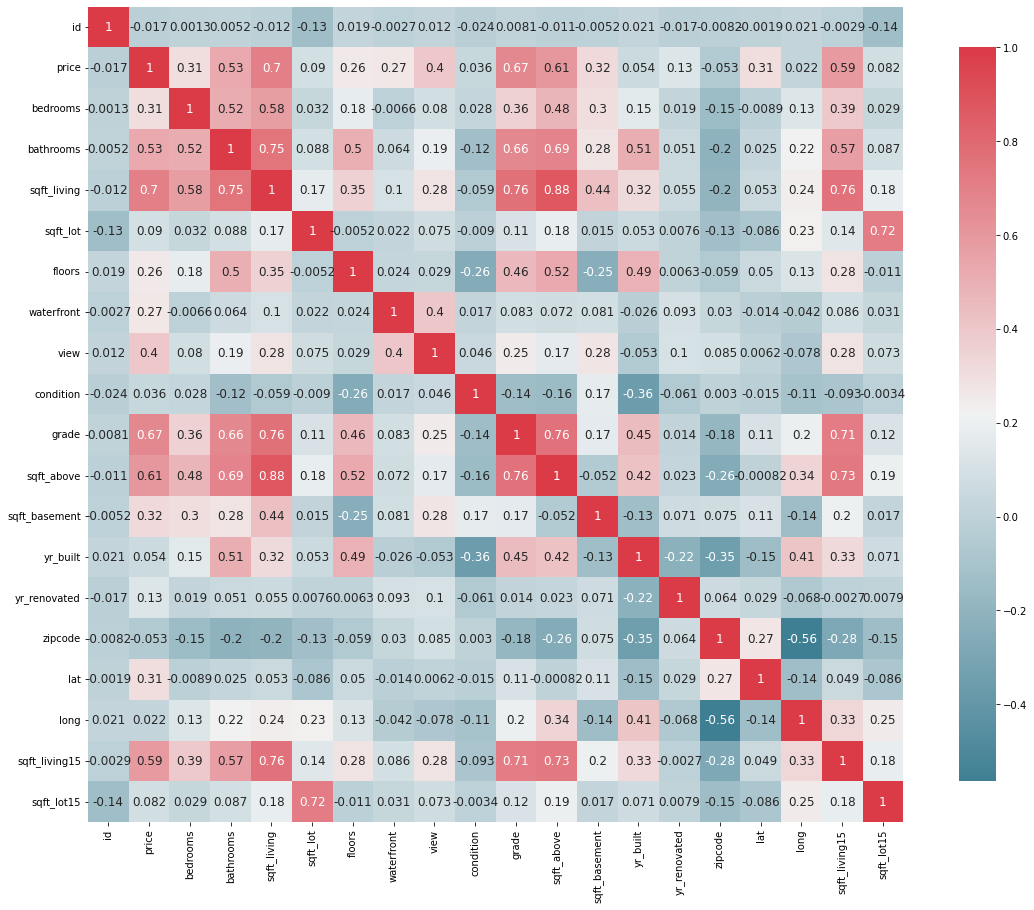

In [14]:
plot_correlation_map()

the most important features according to the correlation map are sqft_living, grade, sqft_above, bathrooms and view

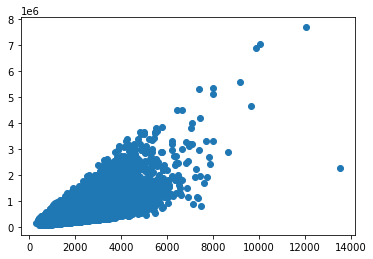

In [26]:
plt.scatter(df["sqft_living"],df["price"])

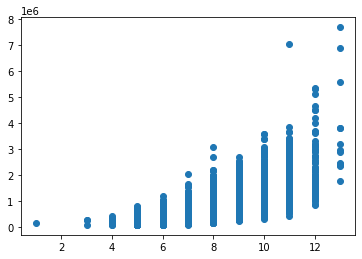

In [28]:
plt.scatter(df["grade"],df["price"])

In [31]:
#Correlation with output variable
cor = df.corr()

cor_target = abs(cor["price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features



price            1.000000
bathrooms        0.525138
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
Name: price, dtype: float64

In [46]:
df[["sqft_living","grade","sqft_above","bathrooms","view"]]

,sqft_living,grade,sqft_above,bathrooms,view
0,1180,7,1180,1.00,0
1,2570,7,2170,2.25,0
2,770,6,770,1.00,0
3,1960,7,1050,3.00,0
4,1680,8,1680,2.00,0
...,...,...,...,...,...
21608,1530,8,1530,2.50,0
21609,2310,8,2310,2.50,0
21610,1020,7,1020,0.75,0
21611,1600,8,1600,2.50,0


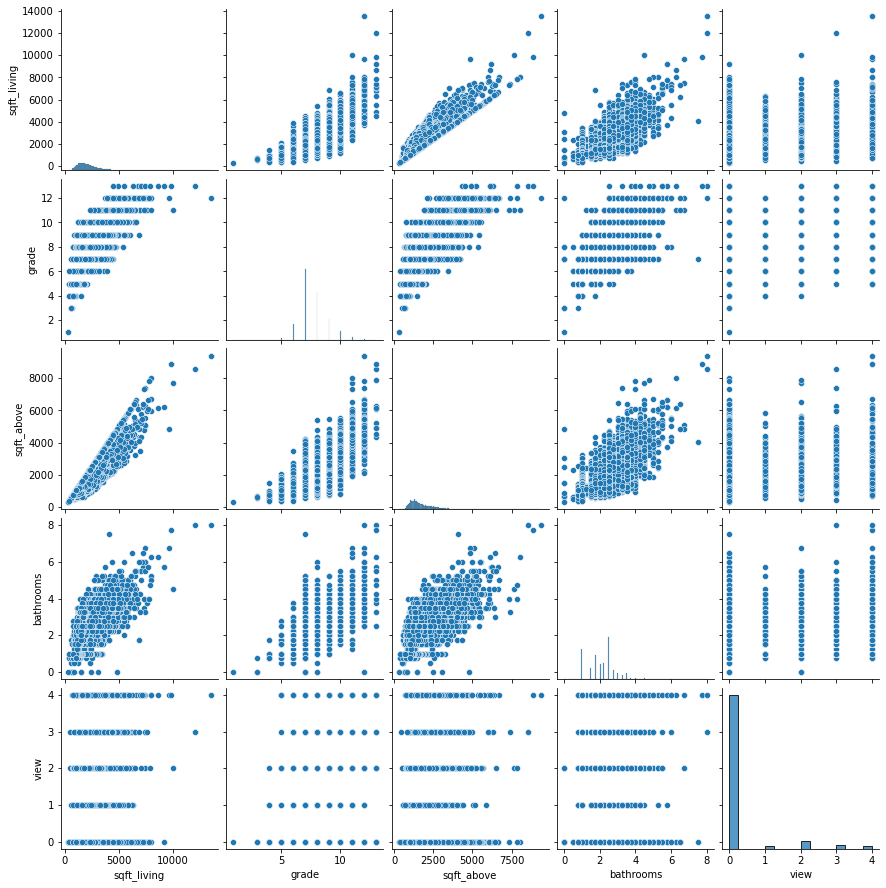

In [45]:
sns.pairplot(df[["sqft_living","grade","sqft_above","bathrooms","view"]])

#linear regression

In [79]:
x=df[["sqft_living"]].values.reshape(-1,1)
y=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=40)
model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)

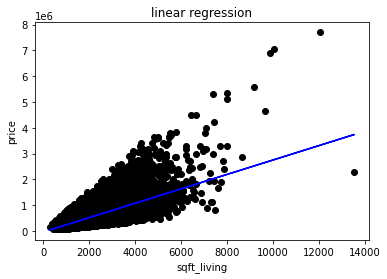

In [83]:
plt.scatter(x,y,color="k")
plt.title("linear regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="b")
plt.show()

In [59]:
x=df[["sqft_living","grade","sqft_above","bathrooms","view"]]    
y=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=40)

In [67]:
model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)

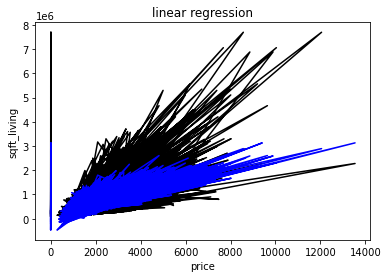

In [69]:
plt.plot(x,y,color="k")
plt.title("linear regression")
plt.ylabel("sqft_living")
plt.xlabel("price")
plt.plot(x,model.predict(x),color="b")
plt.show()

In [65]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 57217393568.31456
R squared 0.5764766442932543


In [66]:
x1=df[["sqft_living","grade"]]
y1=df["price"]
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.8,random_state=40)
model=LinearRegression()
model.fit(x1_train,y1_train)
predicted=model.predict(x1_test)

In [68]:
print("MSE",mean_squared_error(y1_test,predicted))
print("R squared", metrics.r2_score(y1_test,predicted))

MSE 57217393568.31456
R squared 0.5764766442932543


#polynomial regression

In [73]:
x2=df[["sqft_living","grade"]]
y2=df["price"]
lg=LinearRegression() 
poly = PolynomialFeatures(degree = 2) 
x_train=poly.fit_transform(x2)
x_test=poly.fit_transform(x_test)
print("x before transformation: ", x2)
print("x after transformation: ", x_)
lg.fit(x_, y)

x before transformation:         sqft_living  grade
0             1180      7
1             2570      7
2              770      6
3             1960      7
4             1680      8
...            ...    ...
21608         1530      8
21609         2310      8
21610         1020      7
21611         1600      8
21612         1020      7

[21613 rows x 2 columns]
x after transformation:  [[1.0000e+00 1.1800e+03 7.0000e+00 ... 1.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 2.5700e+03 7.0000e+00 ... 5.0625e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 7.7000e+02 6.0000e+00 ... 1.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [1.0000e+00 1.0200e+03 7.0000e+00 ... 5.6250e-01 0.0000e+00 0.0000e+00]
 [1.0000e+00 1.6000e+03 8.0000e+00 ... 6.2500e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 1.0200e+03 7.0000e+00 ... 5.6250e-01 0.0000e+00 0.0000e+00]]


LinearRegression()

In [75]:
x2=df[["sqft_living","grade"]]
y2=df["price"]
lg=LinearRegression() 
poly = PolynomialFeatures(degree = 2) 
x1_train, x1_test, y1_train, y1_test = train_test_split(x2,y2, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)

x1_train_fit = poly.fit_transform(x1_train) #transforming our input data
lg.fit(x1_train_fit, y1_train)
x1_test_ = poly.fit_transform(x1_test)
predicted = lg.predict(x1_test_)

print("MSE: ", metrics.mean_squared_error(y1_test, predicted))
print("R squared: ", metrics.r2_score(y1_test,predicted))

MSE:  50394480701.169464
R squared:  0.5991451594337561
